<div align='center' style="background-color: #2F539B; padding: 12px;">
    <h1 style="font-size: 26px; color: #FFFFFF;">Predict the Chances of Loan Default 
        with 'Debt to Income Ratio' and other 'Loan Parameters' of the Customer</h1>
</div>

Project [Data Source](https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv?resource=download)

# Step1 - Business Understanding:  Defining the Project
###### Important Terminologies Related to Project

- Banks: They are financial institutes which accepts deposits from public and extends loans and advances. They use the differential between interest paid on deposits and interest and fees earned on loans and advances to make profit and pay for all their expenses.
- Debts: Debts is basically the amount (principal + interest) a person/firm/organization owes to creditor (generally Banks and Financial institutes) which is to be paid at a contracted interest rate as per the agreed upon repayment schedule.
- Interest Rate: It is the % of interest either agreed to be paid on deposits or agreed to be charged on the loans/advances given to an individual/firm/organization.
- Default: Defaulting on loan means the loanee is not able to make agreed payment of interest and / or principal on the loan extended.
- NPA: Short form of Non Performing Asset , is a term used for loans where interest and or principal is not paid for a particular number of days/cycle (generally more than 90 days).
- Primary Assets: The value created (in terms of Real Estate, Vehicle, Business) from the loan money.
- Collateral: Assets pledged to banks and financial institutes to back up or secure a loan.

Bank being a financial institution who earns from the differential from the interest they earn from amount lended and interest they pay from deposit received works on a very small margin but in big volume. It’s of high importance to do their due diligence while extending loans on the prospective borrowers, because if the loan goes to default bank will lose upon the income from the stated loan.

How bank avoids loan defaults ?

Bank goes through a variety of mitigating steps to ensure the loan defaults are kept at minimum. One way to do is go through the credit history of the borrower and credit reports. Bank may choose to do analysis on existing data to create a rich profile of existing and prospective customers. This credit history helps banks to draw comfort from the past payment patterns of the proposed and existing customers and help bank to judge the kind of product to offer and the interest rate to be charged from the customer.

In our project, our team leverages the existing database and tries to draw the pattern and relation of following two parameters towards loan delinquency:

1. Interest Rate charged on loan 

2. Existing Debt to Income ratio

Impact of Interest Rate: Interest rate seem to have a direct relation with loan delinquency and default. More the interest rate on a given loan, more is the periodic interest charged on the account and hence higher the EMI/Instalment. This direct relation will have bearing on the loan payment amount and hence in difficult times, when the interest rates higher, the portfolio with higher interest are more at risk of default then one with lower interest rate.

Impact of Existing Debt to Income ratio: Bank also take in to consideration the existing loan obligations of the proposed borrower. This parameter too has a direct bearing on the default rate for a particular loan. Higher this debt to income ratio, more stretched a borrower is in terms of repayment capability. Bank prefers a borrower with lower debt to income ratio, because in difficult times and harsh economic conditions, customer/borrower will have the headspace to mitigate the existing obligation if their debt to income ratio is lower. Many times this ratio is an important tool in deciding the sanctioning of a given loan and arriving at the sanctioned loan amount.

Though captioned 2 parameters play an important role in determining the borrower's recurring liability, but many other factors, such as Loan Amount, Loan Tenure, Current Outstanding Amount and many others too have a weightage in identifying weather a loan will default or not. So in this project, we will try to predict the probability of default of a given loan by studying the impact of all the captioned parameters. We will trim down to the final set of variables during feature selection phase.  This predictive model will find its application in Financial and Banking Institution, which will help in decision making model for them whether to grant a loan to any prospective borrower or not and what interest rate to be charged for the said loan. 



# Step 2 - Data Understanding and Data Cleaning
- Take all the 100,000 records from the year 2015 only from orginal dataset
- Looked through each columns of the dataset, and what they are standing for. From 145 columns, we selected 15 columns that we needed for analyze and predict
- Check missing values and outliers

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# to show large value in two decimals
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# importing the dataset

#pd.set_option('display.max_columns', None)
loan_data = pd.read_csv("Loan_2015.csv", low_memory=False)
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,24700,24700,24700.00,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,35000,35000,35000.00,60 months,12.88,794.21,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000,20000,20000.00,60 months,13.99,465.27,C,C4,...,NaN,NaN,Cash,Y,17-Nov,COMPLETE,17-Sep,9915.00,55.00,1.00
3,NaN,NaN,20000,20000,20000.00,36 months,12.88,672.73,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,14025,14025,14025.00,60 months,18.49,359.90,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118921,NaN,NaN,25000,25000,25000.00,36 months,16.99,891.20,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
118922,NaN,NaN,24825,24825,24825.00,36 months,16.55,879.53,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
118923,NaN,NaN,19650,19650,19650.00,60 months,13.33,450.43,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
118924,NaN,NaN,31200,31200,31200.00,60 months,19.99,826.44,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***There are 145 columns. Some columns have many null values, so we need to selecte more related ones. And there are over 118,000 records.***</u>

### Selecting important and useful columns initially. 

### Project Objective:           The main objective of the project is to try predict if the loan is going to default or not basis various variables. 2 of the most prominent probable variables will be :  

### 1. Loan Interest Rate    
### 2. Debt to Interest Ratio

The data set we used for the project is huge. A majority of the columns such as id, member_id, emp_title,home_ownership,issue_d,url,earliest_cr_line,recoveries, collection_recovery_fee, next_pymnt_d and many more has no direct or indirect relation with loan will default or not. Furthermore, variables like EMI, Instalments, Total Loan Amt, annual_inc,avg_cur_balterm etc are already factored in and are constituted with the values of Interest Rate on the Loan and Debt to Interest Ratio. 



Basis above, below are the description of the various related variables used in the project.

#### Column Description

- delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. <u>***This is our targer value.***</u>
- loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term - The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate - Interest Rate on the loan
- installment - The monthly payment owed by the borrower if the loan originates.
- annual_inc - The self-reported annual income provided by the borrower during registration.
- loan_status - Current status of the loan
- purpose - A category provided by the borrower for the loan request. 
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- open_acc - The number of open credit lines in the borrower's credit file.
- out_prncp - Remaining outstanding principal for total amount funded
- total_pymnt - Payments received to date for total amount funded
- total_rec_prncp - Principal received to date
- total_rec_int - Interest received to date
- application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
- tot_cur_bal - Total current balance of all accounts

**Details and Data Types of these 15 columns are as under.**

In [3]:
loan_data_subset = loan_data[[
                                'loan_amnt',
                                'term', 
                                'int_rate', 
                                'installment', 
                                'annual_inc', 
                                'loan_status', 
                                'purpose',
                                'dti',
#                               Target Variable Excluded
#                               'delinq_2yrs',
                                'open_acc',
                                'out_prncp',
                                'total_pymnt',
                                'total_rec_prncp',
                                'total_rec_int',
                                'application_type', 
                                'tot_cur_bal']].copy()
loan_data_subset.shape

(118926, 15)

In [4]:
# to show data type
loan_data_subset.dtypes

loan_amnt             int64
term                 object
int_rate            float64
installment         float64
annual_inc          float64
loan_status          object
purpose              object
dti                 float64
open_acc              int64
out_prncp           float64
total_pymnt         float64
total_rec_prncp     float64
total_rec_int       float64
application_type     object
tot_cur_bal           int64
dtype: object

In [5]:
# to show our target variable

# columns_to_display = ['delinq_2yrs']
# loan_data[columns_to_display]
loan_data['delinq_2yrs'].value_counts()

0     94101
1     16246
2      4876
3      1819
4       840
5       434
6       226
7       141
8        80
9        51
10       43
11       27
13       14
12       12
14        7
15        3
16        3
18        2
30        1
Name: delinq_2yrs, dtype: int64

In [6]:
# sort delinquency to two categories, and convert non-zero values to "Yes" and zero to "No"
loan_data['delinq_2yrs'] = loan_data['delinq_2yrs'].apply(lambda x: "Yes" if x > 0 else "No").astype(str)

# Check the value counts
pd.set_option('display.max_columns', None)
loan_data['delinq_2yrs'].value_counts()


No     94101
Yes    24825
Name: delinq_2yrs, dtype: int64

**Our target variable "delinq_2yrs" is a continuous data and contains many numeric values.We decided to change or transform them to binary number i.e. '0' and '1'.This gives it a binary outcome with values "yes" and "no". Now We convert these into 0s and 1s.**

We consider 'Yes' as the positive class (indicating delinquency), so we encode 'Yes' as 1 and 'No' as 0. Logic being used : If the delinquent value is greater than 1, we transformed the value to 1, which means this record has been delinquent atleast once in last 2 years, while the value was transformed to 0, for records that had never been delinquent in past 2 years.
- "No" to 0
- "Yes" to 1

In [7]:
loan_data['delinq_2yrs'] = loan_data['delinq_2yrs'].map({'No': 0, 'Yes': 1})
loan_data['delinq_2yrs'].value_counts()

0    94101
1    24825
Name: delinq_2yrs, dtype: int64

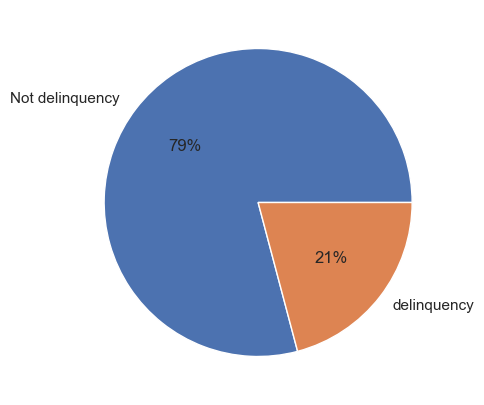

In [8]:
# to plot a pie chart of values of the target variable
sns.set_palette("Set1")
sns.set(rc = {'figure.figsize':(5,5)}, font_scale=1)
b = loan_data['delinq_2yrs'].value_counts()
DelinquencyOutcome = ["Not delinquency ", "delinquency"] 
plt.pie(b, labels = DelinquencyOutcome , autopct='%.0f%%')
plt.show()

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***The target variable is unbalanced. 79% not deliquency while only 21% delinquency. Because we are dealing with default, normally fewer people would delinquency. It is natural, so we will leave it imbalanced.***</u>

### Dupilcated values, missing values and outliers

#### 1. Check Duplicated values

In [9]:
# to show the dupilicated records
loan_data_subset.duplicated().sum()

0

There are no duplicated values in our dataset.

#### 2. Check missing values

In [10]:
loan_data_subset.isna().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
loan_status         0
purpose             0
dti                 2
open_acc            0
out_prncp           0
total_pymnt         0
total_rec_prncp     0
total_rec_int       0
application_type    0
tot_cur_bal         0
dtype: int64

From our selected columns, only the column "dti" has 2 missing values.

In [11]:
# to show the mising values
loan_data_subset[loan_data_subset['dti'].isna()]

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,purpose,dti,open_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,application_type,tot_cur_bal
18083,20000,36 months,16.99,712.96,0.00,Fully Paid,debt_consolidation,NaN,7,0.00,23891.00,20000.00,3891.00,Joint App,8715
65880,3700,36 months,12.59,123.94,0.00,Charged Off,credit_card,NaN,8,0.00,366.64,258.05,108.59,Joint App,24521


We found that the missing values have a 0 value of annual income at the same time.

In [12]:
# to show records with 0 annual income
zero_income = loan_data_subset[loan_data_subset['annual_inc']==0]
zero_income

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,purpose,dti,open_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,application_type,tot_cur_bal
18083,20000,36 months,16.99,712.96,0.00,Fully Paid,debt_consolidation,NaN,7,0.00,23891.00,20000.00,3891.00,Joint App,8715
65880,3700,36 months,12.59,123.94,0.00,Charged Off,credit_card,NaN,8,0.00,366.64,258.05,108.59,Joint App,24521


We selected all 0 income records, which is also the same records. 

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***"dti"(debt to income ratio) has two mingsing records is because ther annual income values are 0.***</u>

**Impute missing values with 0.**

In [13]:
# pute the missing "dti" value with 0
loan_data_subset['dti'].fillna(0, inplace=True)

In [14]:
loan_data_subset.isna().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
loan_status         0
purpose             0
dti                 0
open_acc            0
out_prncp           0
total_pymnt         0
total_rec_prncp     0
total_rec_int       0
application_type    0
tot_cur_bal         0
dtype: int64

#### 3. Check outliers.

In [15]:
loan_data_subset.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal
count,118926.00,118926.00,118926.00,118926.00,118926.00,118926.00,118926.00,118926.00,118926.00,118926.00,118926.00
mean,15096.46,12.24,436.12,78572.29,19.26,11.97,1070.49,15143.41,12123.62,2806.68,142466.11
std,8645.86,4.16,246.66,87550.12,9.49,5.70,3082.97,9682.50,8307.39,2769.67,158448.57
min,1000.00,5.32,14.77,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,8050.00,9.17,257.24,47840.00,12.58,8.00,0.00,7655.32,5970.71,935.49,31432.25
50%,14000.00,11.99,379.14,65000.00,18.71,11.00,0.00,13010.56,10000.00,1848.57,81899.50
75%,20000.00,14.48,573.83,94000.00,25.53,15.00,0.00,20872.74,16350.00,3746.21,210588.25
max,35000.00,28.99,1445.46,9000000.00,999.00,67.00,23220.38,58558.31,35000.00,24646.86,3608951.00


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***From the brief description above, we find that:***<br>
    ***- the mean and median of interest rate are similar;***<br>
    ***- dti has a min of 0 and max is 999, which means a large variance;***
</u>

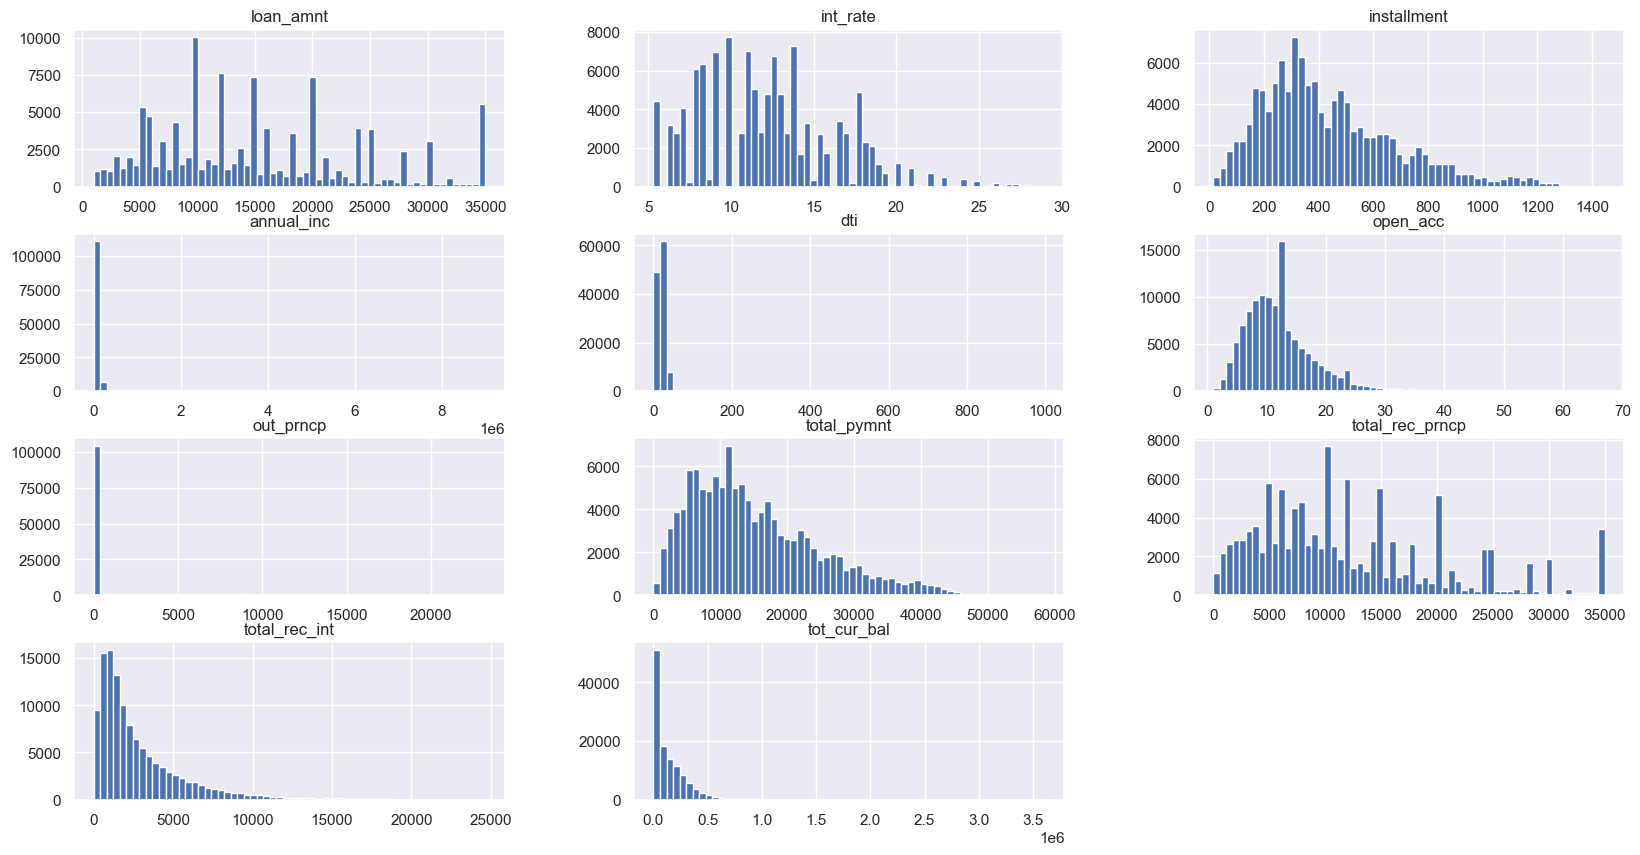

In [16]:
# to show histogram 
loan_data_subset.hist(bins=60, figsize=(20, 10))
plt.show()

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***All numerical variables are not normally distributed.***</u>

***Explore further about the most intrested variables: "dti".***

***"dti" - Debt to Income Ratio***

12.702498365579949

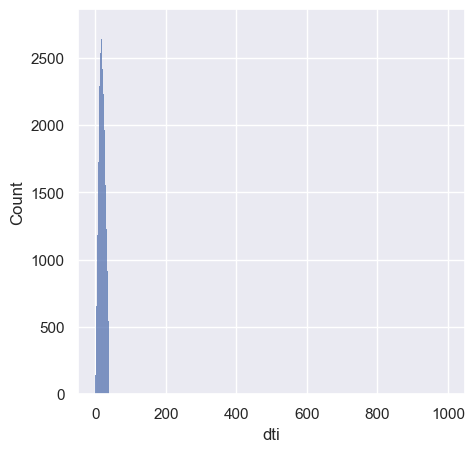

In [26]:
# to show the distribution of "dti" graphly
sns.histplot(loan_data_subset['dti'], bins='auto')
loan_data_subset['dti'].skew()

Using manually bins to form the distribution of "dti" values.

   Bin Edges  Frequency  Percentage
0          0      15143       12.73
1          9      40738       34.25
2         18      38536       32.40
3         27      20742       17.44
4         36       3708        3.12
5         45         59        0.05


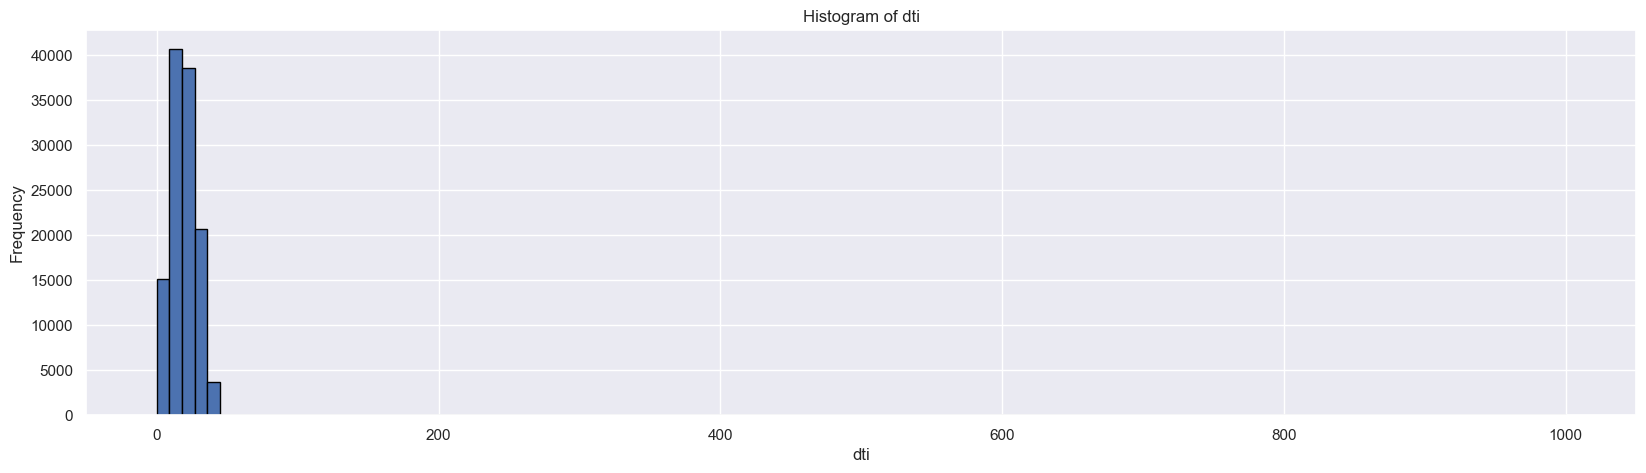

In [27]:
# Max=999, Q1=12.58, Q3=25.53, so IQR=12.95, 1.5 * IQR = 19.425
bins = [0, 9, 18, 27, 36, 45, 1000]
hist_data = loan_data_subset['dti']
hist, bin_edges = np.histogram(hist_data, bins=bins)

# Calculate the total count of data points
total_count = len(hist_data)

# Create a frequency table with percentages
percentage_table = pd.DataFrame({'Bin Edges': bin_edges[:-1], 'Frequency': hist})
percentage_table['Percentage'] = (percentage_table['Frequency'] / total_count) * 100

# Display the frequency table with percentages
print(percentage_table)

# Plot the histogram
loan_data_subset['dti'].hist(bins=bins, edgecolor='black', figsize=(20, 5))
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.title('Histogram of dti')
plt.show()

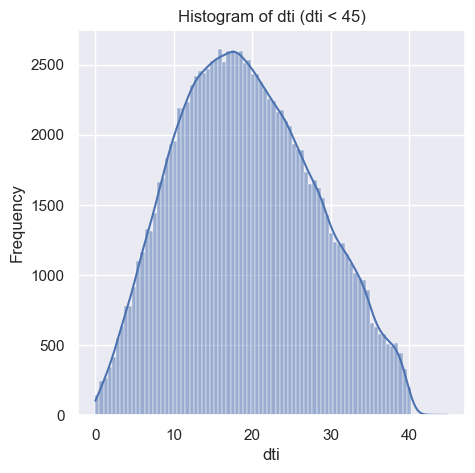

In [28]:
# to show the distribution when exclude the outliers
filtered_dti = loan_data_subset[loan_data_subset['dti'] < 45]

# Plot the filtered data
sns.histplot(filtered_dti['dti'], bins='auto', kde=True)
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.title('Histogram of dti (dti < 45)')
plt.show()

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***Outliers of "dti" are values less than -7 or values larger than 45, around 0.05% records are outliers. And after we excluded the outliers, it is almost normally distributed***</u>

<Axes: xlabel='dti', ylabel='delinq_2yrs'>

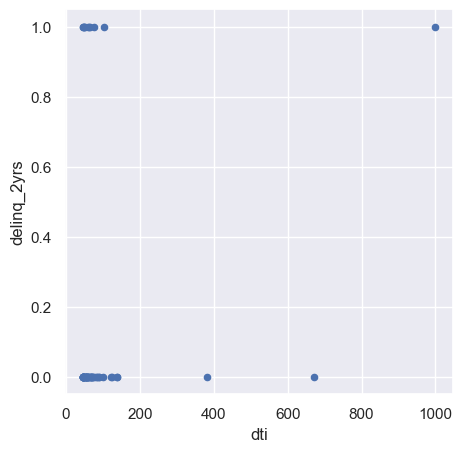

In [17]:
# Q3 + 1.5*IQR = 45, select the oultiers of "dti"
large_dti = loan_data[loan_data['dti']>45]
large_dti[['delinq_2yrs', 'dti']].plot(kind='scatter', x='dti', y='delinq_2yrs')

In general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified for a mortgage. 

<Axes: xlabel='dti', ylabel='delinq_2yrs'>

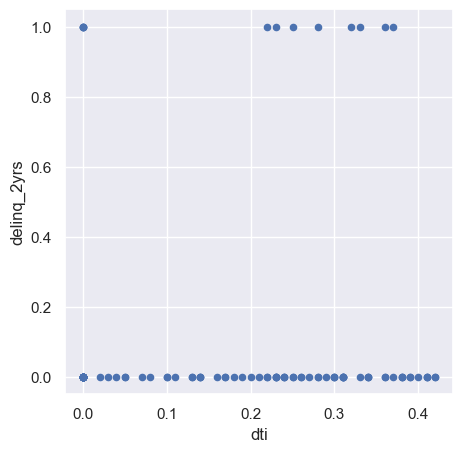

In [18]:
large_dti = loan_data[loan_data['dti']<0.43]
large_dti[['delinq_2yrs', 'dti']].plot(kind='scatter', x='dti', y='delinq_2yrs')

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***When the value of "dti" is lower than 43%, we can find that less people are delinquent.***</u>

# Step 3 - Correlation & Feature Selection

## Feature Selection Method 1 : Filtered method

**Our target variable is a categorical, and we have both categorical and continuous variables in our independent variables. We seperate them to find their correlation.**

**Split the dataset into continuous and categorical**

In [204]:
# only select continuous columns
numeric_data = loan_data_subset.select_dtypes(include=[np.number])

# only select categorical columns
categorical_data = loan_data_subset.select_dtypes(include=['category', 'object'])

### (1) For categorical independent variables, using Chi-Square

**A. Correlation between independent variables and target variables**

In [170]:
from scipy.stats import chi2_contingency

categorical_variable = 'delinq_2yrs'

# Initialize variables to store p-values
p_values = {}

# Set the significance level
alpha = 0.05

for independent_variable in categorical_data.columns:
    if independent_variable != categorical_variable:
        crosstab = pd.crosstab(loan_data[categorical_variable], loan_data_subset[independent_variable])
        chi2, p, dof, expected = chi2_contingency(crosstab)
        
        # Store the p-value for each variable
        p_values[independent_variable] = p


# Display the variables with their p-values in ascending order of correlation strength
sorted_p_values = sorted(p_values.items(), key=lambda x: x[1])

# Print correlated variables
print("Categorical variables correlated with 'delinq_2yrs' in order of correlation strength:")
for variable, p in sorted_p_values:
    if p < alpha:
        print(f"Variable: {variable} is correlated with {categorical_variable} (P-value: {p})")
    else:
        print(f"Variable: {variable} is not correlated with {categorical_variable} (P-value: {p})")


Categorical variables correlated with 'delinq_2yrs' in order of correlation strength:
Variable: purpose is correlated with delinq_2yrs (P-value: 1.3119099083256749e-46)
Variable: loan_status is correlated with delinq_2yrs (P-value: 1.7851014759577971e-06)
Variable: term is correlated with delinq_2yrs (P-value: 0.01202822453150984)
Variable: application_type is not correlated with delinq_2yrs (P-value: 0.45610179668026685)


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***"purpose", "loan_status" and "term" are correlated with our target variable, and "purpose" has the strongest correlation with the target variable.***</u>

**B. Correlation between independent variables**

In [31]:
from scipy.stats import chi2_contingency

pairs = [('term', 'loan_status'), ('term', 'purpose'), ('loan_status', 'purpose')]

for pair in pairs:
    contingency_table = pd.crosstab(loan_data_subset[pair[0]], loan_data_subset[pair[1]])
    
    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"\nChi-Square Test for {pair[0]} and {pair[1]}:")
    print(f"Chi-Square Value: {chi2}")
    print(f"P-value: {p}")

    # print the results based on the p-value
    if p < 0.05:
        print("There is a significant association between this two indenpendent variables.")
    else:
        print("The variables are independent.")



Chi-Square Test for term and loan_status:
Chi-Square Value: 39296.98370354811
P-value: 0.0
There is a significant association between this two indenpendent variables.

Chi-Square Test for term and purpose:
Chi-Square Value: 1464.5485466469236
P-value: 1.4196212164696349e-307
There is a significant association between this two indenpendent variables.

Chi-Square Test for loan_status and purpose:
Chi-Square Value: 811.3433435964939
P-value: 4.422107996318705e-135
There is a significant association between this two indenpendent variables.


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***For categorical independent variables, all 3 variables are correlated with each other, which are "term", "purpose" and "loan_status". The most related one is "purpose", and it has the smallest p-value. So we only use "purpose" as our input categorical variable.***</u>

### (2) For continuous independent variables, using ANOVA

**A. Correlation between independent variables and target variables**

In [171]:
from scipy.stats import f_oneway

categorical_variable = 'delinq_2yrs'


# Create empty lists to store correlated and non-correlated variables
correlated_variables = []
non_correlated_variables = []

# Set the significance level
alpha = 0.05

# We loop through each numerical variable in numeric_data
for column in numeric_data.columns:
    # Perform one-way ANOVA
    p_values = []
    for category, group in numeric_data.groupby(loan_data[categorical_variable]):
        p_values.append(group[column])
    
    f_statistic, p_value = f_oneway(*p_values)

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        correlated_variables.append((column, f_statistic, p_value))
    else:
        non_correlated_variables.append((column, f_statistic, p_value))

# Sort correlated variables based on f-statistics in descending order
sorted_correlated_variables = sorted(correlated_variables, key=lambda x: x[1], reverse=True)

# Print correlated variables
print("Continuous variables correlated with 'delinq_2yrs' in order of correlation strength:")
for variable, f_statistic, p_value in sorted_correlated_variables:
    print(f"{variable}: F-statistic = {f_statistic}, P-value = {p_value}")

# Print non-correlated variables
print("\nContinuous variables not correlated with 'delinq_2yrs':")
for variable, f_statistic, p_value in non_correlated_variables:
    print(f"{variable}: F-statistic = {f_statistic}, P-value = {p_value}")


Continuous variables correlated with 'delinq_2yrs' in order of correlation strength:
tot_cur_bal: F-statistic = 527.245678974778, P-value = 2.0145357923664445e-116
int_rate: F-statistic = 287.1834615828158, P-value = 2.4319960774066566e-64
open_acc: F-statistic = 263.66590004250133, P-value = 3.15728702995982e-59
annual_inc: F-statistic = 126.51919785659025, P-value = 2.4492517110398613e-29
total_rec_int: F-statistic = 62.72952261610813, P-value = 2.391659550635842e-15
total_rec_prncp: F-statistic = 26.982810159359158, P-value = 2.056102681549292e-07
dti: F-statistic = 13.718091086423685, P-value = 0.00021249464926777274

Continuous variables not correlated with 'delinq_2yrs':
loan_amnt: F-statistic = 2.1706677199155, P-value = 0.14066779224602313
installment: F-statistic = 2.5842524021421887, P-value = 0.10793401192659564
out_prncp: F-statistic = 2.5731512625649393, P-value = 0.10869367456529076
total_pymnt: F-statistic = 2.4820525913806666, P-value = 0.11515454707902557


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***From above:***<br>
    ***- For each variable, we perform a one-way ANOVA using f_oneway to compare the means across the different categories of 'delinq_2yrs';***<br>
    ***- If the p-value is less than the significance level (0.05), we consider the variable as correlated with 'delinq_2yrs' and add it to the correlated_variables list, then we print the numerical variables that are correlated with 'delinq_2yrs';***<br>
    ***- Now, we have these 7 variables that are correlated with our target variable.***
</u>

**B. Correlation between independent variables**

In [34]:
data_correlation = related_numeric.corr()
data_correlation

,int_rate,annual_inc,dti,open_acc,total_rec_prncp,total_rec_int,tot_cur_bal
int_rate,1.00,-0.08,0.19,-0.02,-0.10,0.46,-0.09
annual_inc,-0.08,1.00,-0.14,0.11,0.24,0.12,0.34
dti,0.19,-0.14,1.00,0.27,-0.05,0.12,0.00
open_acc,-0.02,0.11,0.27,1.00,0.14,0.12,0.25
total_rec_prncp,-0.10,0.24,-0.05,0.14,1.00,0.42,0.30
total_rec_int,0.46,0.12,0.12,0.12,0.42,1.00,0.15
tot_cur_bal,-0.09,0.34,0.00,0.25,0.30,0.15,1.00


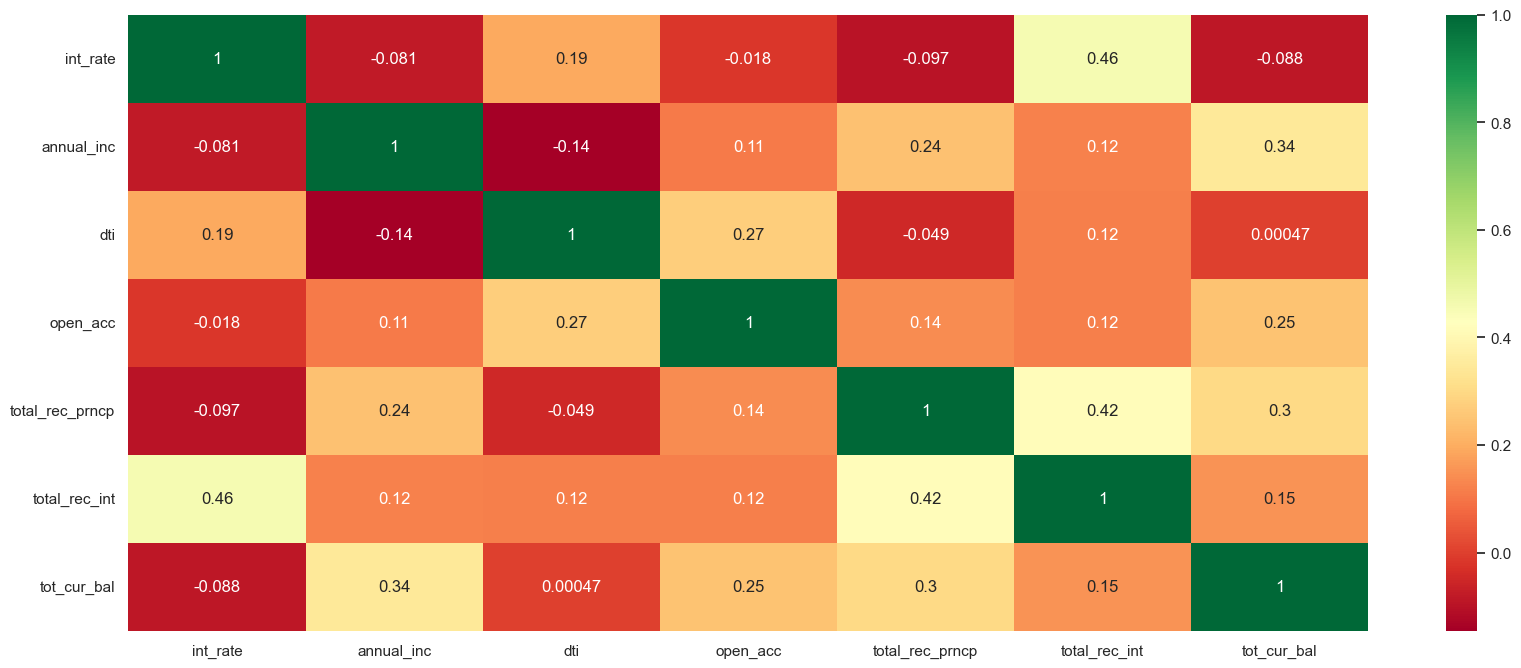

In [35]:
# to show heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
g=sns.heatmap(data_correlation, annot=True,cmap="RdYlGn")
sns.set(font_scale=1.2)

All of the continuous variables are not highly correlated.

- "total_rec_int" and "int_rate" has a moderate correlation, with correlation coefficient of 0.46.
- "total_rec_int" and "total_rec_prncp" has a moderate correlation, with correlation coefficient of 0.42.

### (3) Combine categorical variables and continuous variables

**The correlation between selected continuous variables and the categorical variable.**

In [37]:
import pandas as pd
from scipy.stats import f_oneway

categorical_variable = 'purpose'

# Select the numerical variables
numeric_data = selected_features_numeric

# Create empty lists to store correlated and non-correlated variables
correlated_variables = []
non_correlated_variables = []

# Set the significance level
alpha = 0.05

# We loop through each numerical variable in numeric_data
for column in numeric_data.columns:
    # Perform one-way ANOVA
    p_values = []
    for category, group in numeric_data.groupby(loan_data[categorical_variable]):
        p_values.append(group[column])
    
    f_statistic, p_value = f_oneway(*p_values)

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        correlated_variables.append((column, f_statistic, p_value))
    else:
        non_correlated_variables.append((column, f_statistic, p_value))

# Sort correlated variables based on f-statistics in descending order
sorted_correlated_variables = sorted(correlated_variables, key=lambda x: x[1], reverse=True)

# Print correlated variables
print("Numerical variables correlated with 'purpose' in order of correlation strength:")
for variable, f_statistic, p_value in sorted_correlated_variables:
    print(f"{variable}: F-statistic = {f_statistic}, P-value = {p_value}")

# Print non-correlated variables
print("\nNumerical variables not correlated with 'purpose':")
for variable, f_statistic, p_value in non_correlated_variables:
    print(f"{variable}: F-statistic = {f_statistic}, P-value = {p_value}")

Numerical variables correlated with 'purpose' in order of correlation strength:
int_rate: F-statistic = 678.5771374927402, P-value = 0.0
total_rec_prncp: F-statistic = 353.4493768907889, P-value = 0.0
tot_cur_bal: F-statistic = 115.30882318250696, P-value = 8.002910481305206e-264
dti: F-statistic = 104.45949021481432, P-value = 2.3257344998675765e-238
open_acc: F-statistic = 51.11285995422676, P-value = 3.14452109825902e-113
annual_inc: F-statistic = 32.0184111840488, P-value = 1.0611866379041934e-68

Numerical variables not correlated with 'purpose':


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***The categorical variable is correlated with all of the continuous variables, so we can use numerical variables only.***</u>

## Feature Selection Method 2 :  Feature Importance

**Create dummy variables for categorical variables and combine them with continuous variables**

In [205]:
# Convert categorical variables to dummy variables
dummy_variables = pd.get_dummies(categorical_data)

# Concatenate numeric and dummy variables
combined_dataset = pd.concat([numeric_data, dummy_variables], axis=1)

# Display the new dataset
combined_dataset.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,term_ 36 months,term_ 60 months,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,application_type_Individual,application_type_Joint App
0,24700,11.99,820.28,65000.00,16.06,22,0.00,25679.66,24700.00,979.66,204396,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,35000,12.88,794.21,106000.00,17.36,8,0.00,22208.07,10323.88,7086.13,299890,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,20000,13.99,465.27,70000.00,16.90,20,0.00,15473.02,2965.17,2592.85,34856,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,20000,12.88,672.73,145000.00,12.28,12,672.76,23509.77,19327.24,4182.53,429218,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,14025,18.49,359.90,39000.00,18.00,12,0.00,16341.39,14025.00,2316.39,60381,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


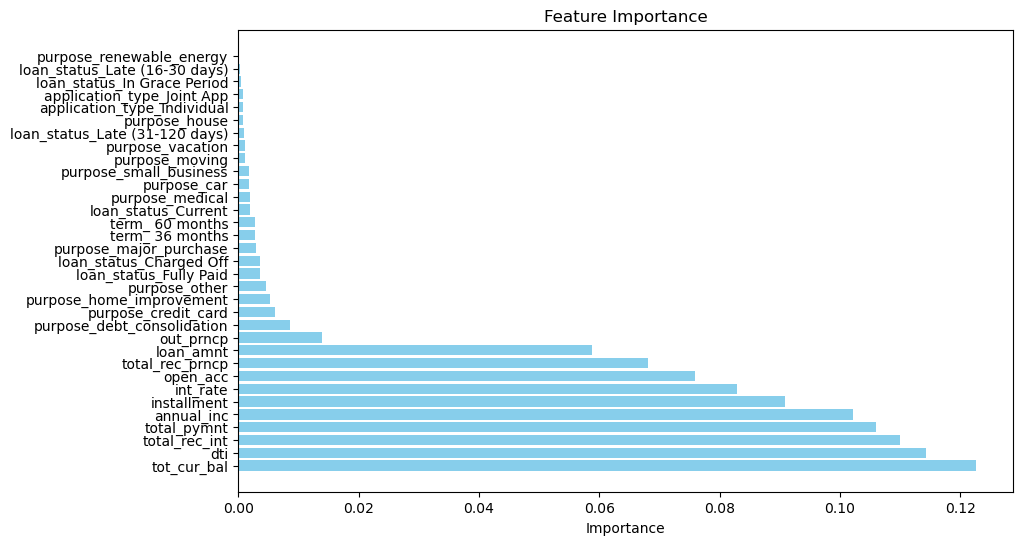

In [206]:
from sklearn.ensemble import RandomForestClassifier

X = combined_dataset
y = loan_data['delinq_2yrs']

# Initialize a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
clf.fit(X, y)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [209]:
top_10_features = feature_importance_df.head(10)
print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
            Feature  Importance
10      tot_cur_bal        0.12
4               dti        0.11
9     total_rec_int        0.11
7       total_pymnt        0.11
3        annual_inc        0.10
2       installment        0.09
1          int_rate        0.08
5          open_acc        0.08
8   total_rec_prncp        0.07
0         loan_amnt        0.06


### Select features by combing the result of two feature selection methods

In [212]:
overlapping_columns = set(selected_features_numeric.columns) & set(feature_importance_df['Feature'].head(10))

print("Overlapping Columns:")
print(overlapping_columns)

Overlapping Columns:
{'total_rec_int', 'annual_inc', 'total_rec_prncp', 'dti', 'open_acc', 'int_rate', 'tot_cur_bal'}


In [16]:
# select features
selected_features = loan_data_subset[[
                   "int_rate", 
                   "annual_inc", 
                   "dti",
                    "open_acc", 
                   "total_rec_prncp", 
                   "total_rec_int",
                   "tot_cur_bal"
                                     ]]

In [17]:
columns_list = selected_features.columns.tolist()
print(columns_list)

['int_rate', 'annual_inc', 'dti', 'open_acc', 'total_rec_prncp', 'total_rec_int', 'tot_cur_bal']


# Step 4 - Data Normalization

In [18]:
# to show skewness
selected_features.skew()

int_rate           0.62
annual_inc        48.94
dti               12.70
open_acc           1.26
total_rec_prncp    0.93
total_rec_int      2.04
tot_cur_bal        2.90
dtype: float64

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***All of the independent continuous variables are positive skewed. Some are slightly postive skewed. However, annual_inc(annual income) and dti are highly positive skewed.***</u>

**Using log transformation to normalize data.**

Log transformation is effective in reducing the impact of skewness, especially in right-skewed distributions. But we should be cautious of the zero or negative values. 

In [19]:
# Check for 0 values
zero_values = (selected_features == 0).sum()

# Check for negative values
negative_values = (selected_features < 0).sum()

# Print the results
print("Zero Values:\n", zero_values)
print("\nNegative Values:\n", negative_values)

Zero Values:
 int_rate            0
annual_inc          2
dti                31
open_acc            0
total_rec_prncp    90
total_rec_int      87
tot_cur_bal        16
dtype: int64

Negative Values:
 int_rate           0
annual_inc         0
dti                0
open_acc           0
total_rec_prncp    0
total_rec_int      0
tot_cur_bal        0
dtype: int64


In [20]:
# List of columns to be log-transformed
columns_to_log = columns_list

# Columns to exclude from log transformation
columns_to_exclude = ['int_rate', 'total_rec_prncp']

# Exclude specified columns from the list
columns_to_log = [col for col in columns_to_log if col not in columns_to_exclude]


# Log-transform the selected columns after adding 1
log_transformed = np.log1p(selected_features[columns_to_log] + 1)

# Combine the log-transformed columns with the original dataset
data_normalized = pd.concat([log_transformed, selected_features.drop(columns=columns_to_log)], axis=1)

# Display the normalized dataset
data_normalized.skew()

annual_inc         0.12
dti               -0.94
open_acc          -0.00
total_rec_int     -0.88
tot_cur_bal       -0.52
int_rate           0.62
total_rec_prncp    0.93
dtype: float64

In [21]:
data_normalized.kurtosis()

annual_inc         3.79
dti                1.19
open_acc          -0.05
total_rec_int      2.62
tot_cur_bal        0.70
int_rate           0.32
total_rec_prncp    0.32
dtype: float64

**Scaling data using min_max_scaler.**

In [24]:
from sklearn import preprocessing

data = data_normalized[columns_list]
cols = data.columns
df = pd.DataFrame(data)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
data_Normalized = pd.DataFrame(np_scaled, columns = cols)
data_Normalized

,int_rate,annual_inc,dti,open_acc,total_rec_prncp,total_rec_int,tot_cur_bal
0,0.28,0.68,0.35,0.66,0.71,0.66,0.80
1,0.32,0.71,0.37,0.38,0.29,0.87,0.83
2,0.37,0.68,0.36,0.64,0.08,0.76,0.68
3,0.32,0.73,0.32,0.49,0.55,0.81,0.85
4,0.56,0.64,0.37,0.49,0.40,0.75,0.72
...,...,...,...,...,...,...,...
118921,0.49,0.70,0.37,0.44,0.71,0.87,0.83
118922,0.47,0.77,0.38,0.53,0.71,0.86,0.80
118923,0.34,0.70,0.46,0.73,0.56,0.65,0.79
118924,0.62,0.68,0.35,0.31,0.49,0.95,0.69


**Boxplot the data before normalized.**

<Axes: >

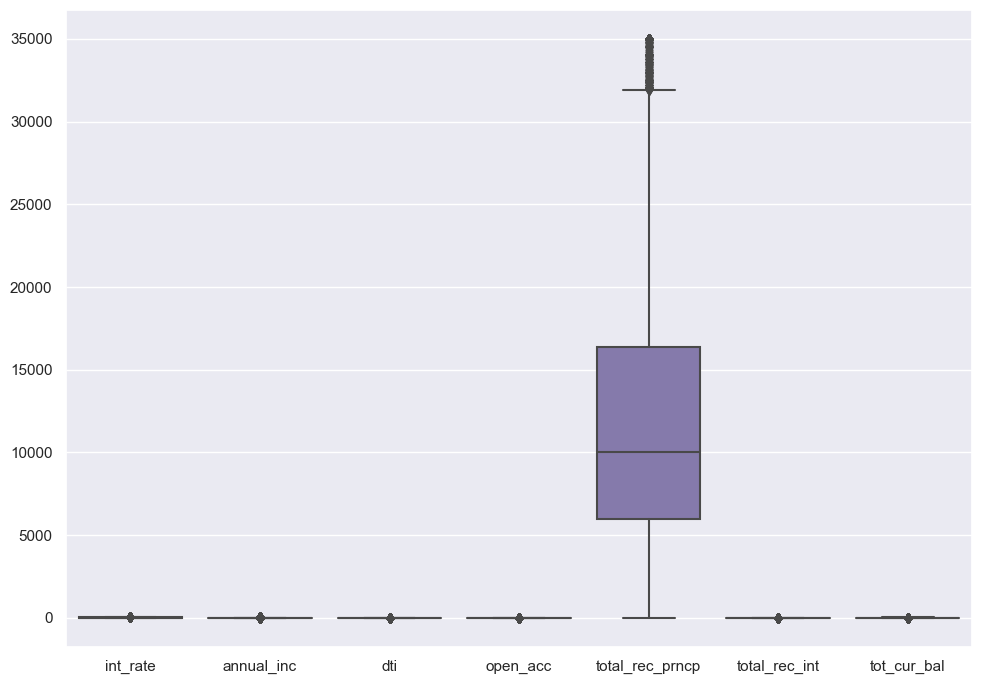

In [25]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
data = data_normalized[columns_list]

sns.boxplot(data=data)

**Boxplot the data after Normalization.**

<Axes: >

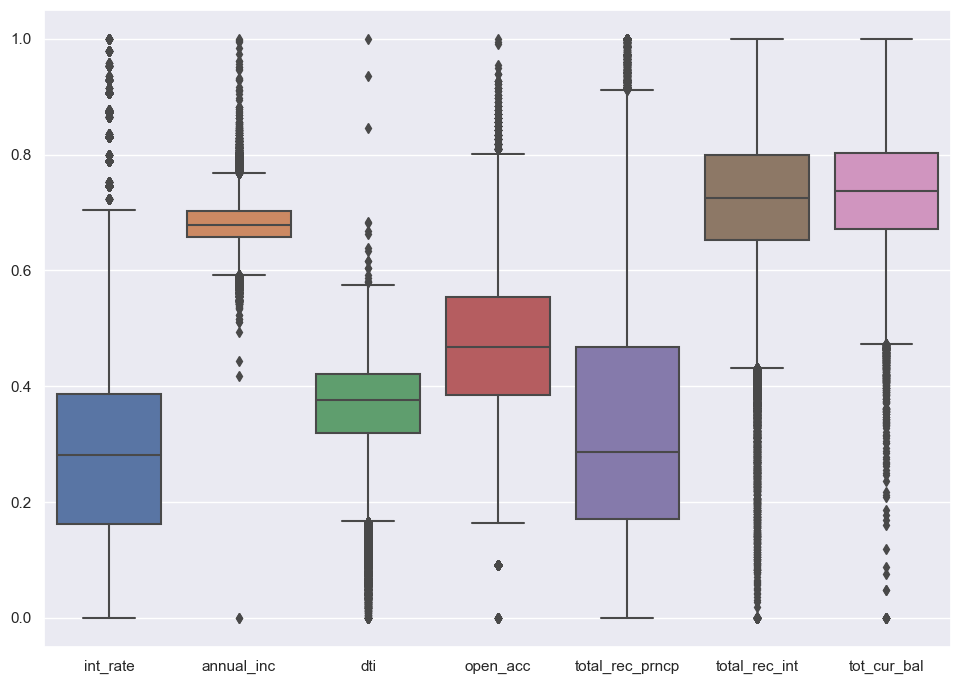

In [26]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=data_Normalized)

# Step 5 - Modeling

**Our input variables are continuous and target variable is categorical. Based on that, we select the follwoing models:**
1. Logistic Regression Model
2. KNN (K-Nearest-Neighbors) Model
3. Decision Tree Model

## Splitting the data into train and test

In [65]:
from sklearn.model_selection import train_test_split

X = data_Normalized  #independent columns
# y = loan_data_filtered['delinq_2yrs'] 
y = loan_data['delinq_2yrs'] # target variables

# 75% training and 25% test

# split balanced data
# X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, 
#                                                     test_size=0.2, random_state=42) 

# split cleaned data but leave it imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42)

## Model 1: Logistic Regression 
Assumptions of Logistic Regression
- No outliers in the data. An outlier can be identified by analyzing the independent variables. 
- No correlation (multi-collinearity) between the independent variables. 


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [33]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(89194, 7)

(89194,)

(29732, 7)

(29732,)

In [34]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y_train.astype(float), X_train.astype(float))
log_model=logit.fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.509208
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            delinq_2yrs   No. Observations:                89194
Model:                          Logit   Df Residuals:                    89187
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                0.006108
Time:                        15:53:50   Log-Likelihood:                -45418.
converged:                       True   LL-Null:                       -45697.
Covariance Type:            nonrobust   LLR p-value:                2.394e-117
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
int_rate            0.7502      0.053     14.261      0.000       0.647       0.853
annual_inc         -3.8615      0.144    -26.746      0.000      -4.144      -3.579
dti                -2.5286      0.112    -22.637      0.000      -2.748      -2.310
open_acc            1.1563      0.075     15.499      0.000       1.010       1.302
total_rec_prncp    -0.2438      0.041     -5.897      0.000      -0.325      -0.163
total_rec_int      -0.1367      0.090     -1.513      0.130      -0.314       0.040
tot_cur_bal         2.2245      0.122     18.283      0.000       1.986       2.463
===================================================================================
"""

In [35]:
import sklearn as sk
import os
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_squared_error

logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train,y_train)
# fit the model with data
logreg.fit(X_train,y_train)

y_pred_lr = logreg.predict(X_test)
# import the metrics class
cnf_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
print(cnf_matrix_lr)

accu_reg=round(accuracy_score(y_test,logreg.predict(X_test)),3)
f1_score_reg=round(f1_score(y_test,logreg.predict(X_test),average='weighted'),3)
Precision_reg = round(precision_score(y_test, logreg.predict(X_test), average='weighted', zero_division=1), 3)
Recall_reg=round(recall_score(y_test,logreg.predict(X_test),average='weighted'),3)
print('Accuracy:',accu_reg)
print('F1_Score:',f1_score_reg)
print('Recall_Score:',Precision_reg)
print('Precision_Score:',Recall_reg)
print('Cross Validation Score:',(np.mean(cross_val_score(logreg, X_train, y_train, cv = 6))))

[[23525     4]
 [ 6202     1]]
Accuracy: 0.791
F1_Score: 0.699
Recall_Score: 0.668
Precision_Score: 0.791
Cross Validation Score: 0.7911406637494299


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***From Logistic Model:***<br>
    ***- The variable "annual_inc" and "dti" have the larget the absolute value of the coefficient, so they are the most influential variables in the logistic regression model.*** 
</u>

## Model 2: KNN

KNN does not make any distributional assumptions, but using Euclidean distance (Euclidean distance in known to be sensitive to magnitudes of the input data), so scaling data is important for KNN.

Accuracy for k = 1 is: 0.6753666083680883
Accuracy for k = 2 is: 0.7654379120139917
Accuracy for k = 3 is: 0.7297524552670523
Accuracy for k = 4 is: 0.7743845015471545
Accuracy for k = 5 is: 0.7544060271761065
Accuracy for k = 6 is: 0.7784205569756492
Accuracy for k = 7 is: 0.7678259114758509
Accuracy for k = 8 is: 0.7826920489708059
Accuracy for k = 9 is: 0.776637965828064


Text(0, 0.5, 'Accuracy')

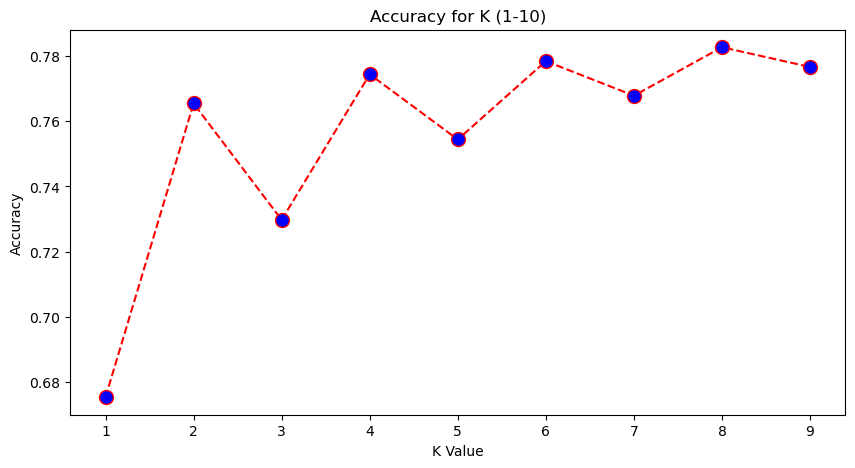

In [244]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, accuracy_score

accuracy = []
for k in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_preds_knn = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_preds_knn))
    print("Accuracy for k =", k, "is:", accuracy_score(y_test, y_preds_knn)) 
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy for K (1-10)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score

KNNclassifier = KNeighborsClassifier(n_neighbors=9)
KNNclassifier.fit(X_train, y_train)

y_preds_knn = classifier.predict(X_test)

# print confusion metrics
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_preds_knn)
print(cnf_matrix_knn)

accu_knn=round(accuracy_score(y_test,KNNclassifier.predict(X_test)),3)
f1_score_knn=round(f1_score(y_test,KNNclassifier.predict(X_test),average='weighted'),3)
Precision_knn=round(precision_score(y_test,KNNclassifier.predict(X_test),average='weighted'),3)
Recall_knn=round(recall_score(y_test,KNNclassifier.predict(X_test),average='weighted'),3)
print('Accuracy:',accu_knn)
print('F1_Score:',f1_score_knn)
print('Recall_Score:',Precision_knn)
print('Precision_Score:',Recall_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(KNNclassifier, X_train, y_train, cv = 6))))

[[22749   780]
 [ 5861   342]]
Accuracy: 0.777
F1_Score: 0.71
Recall_Score: 0.693
Precision_Score: 0.777
Cross Validation Score: 0.7738077115613989


In [197]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': KNNclassifier.predict(X_test)})

# Display the DataFrame
print(results_df)


       Actual  Predicted
5649        0          0
26587       0          0
4250        0          0
82175       1          0
20138       0          1
...       ...        ...
75433       0          0
46114       0          0
53528       0          1
12813       0          0
92903       0          0

[29732 rows x 2 columns]


## Model 3: Decision Tree

In [246]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred_dt)

# Print the results
print(f"Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.671
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     23529
           1       0.24      0.26      0.25      6203

    accuracy                           0.67     29732
   macro avg       0.52      0.52      0.52     29732
weighted avg       0.68      0.67      0.68     29732



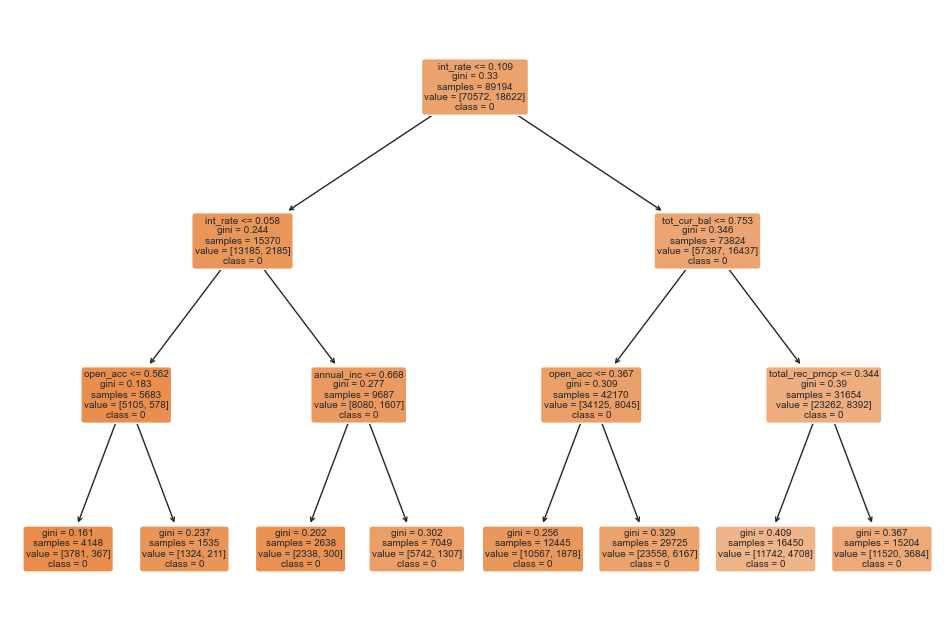

In [43]:
from sklearn.tree import plot_tree

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=list(X_train.columns), class_names=['0', '1'], filled=True, rounded=True)
plt.show()


In [252]:
# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

cnf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print the results
print(cnf_matrix_dt)
print(f'Accuracy: {accuracy_dt:.3f}')
print(f'F1 Score: {f1_score_dt:.3f}')
print(f'Precision: {precision_dt:.3f}')
print(f'Recall: {recall_dt:.3f}')
print('Cross Validation Score:',(np.mean(cross_val_score(dt_classifier, X_train, y_train, cv = 6))))

[[18343  5186]
 [ 4589  1614]]
Accuracy: 0.671
F1 Score: 0.677
Precision: 0.683
Recall: 0.671
Cross Validation Score: 0.7912191410965729


Get the number of nodes of the tree without pruning.

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to your training data
dt_classifier.fit(X_train, y_train)

# Get the number of nodes in the tree
num_nodes = dt_classifier.tree_.node_count
print("Number of nodes in the tree before pruning:", num_nodes)


Number of nodes in the tree before pruning: 34735


Pruning the tree by controling the size of the tree, so we adjusted the hyperparameters:
- max_depth: The maximum depth of the tree;
- min_samples_split: The minimum number of samples required to split an internal node.

In [41]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10] 

# Create the grid search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_dt = best_dt_classifier.predict(X_test)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10}


In [46]:
# Create a Decision Tree classifier with specified hyperparameters
dt_classifier_ap = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# Train the model
dt_classifier_ap.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_prued = dt_classifier.predict(X_test)
# Calculate metrics
accuracy_dt_ap = accuracy_score(y_test, y_pred_dt_prued)
f1_score_dt_ap = f1_score(y_test, y_pred_dt_prued, average='weighted')
precision_dt_ap = precision_score(y_test, y_pred_dt_prued, average='weighted')
recall_dt_ap = recall_score(y_test, y_pred_dt_prued, average='weighted')

cnf_matrix_dt_ap = confusion_matrix(y_test, y_pred_dt_prued)

# Print the results
print(cnf_matrix_dt_ap)
print(f'Accuracy after pruning: {accuracy_dt_ap:.3f}')
print(f'F1 Score after pruning: {f1_score_dt_ap:.3f}')
print(f'Precision after pruning: {precision_dt_ap:.3f}')
print(f'Recall after pruning: {recall_dt_ap:.3f}')
print('Cross Validation Score after pruning:',(np.mean(cross_val_score(dt_classifier, X_train, y_train, cv = 6))))

[[23528     1]
 [ 6203     0]]
Accuracy after pruning: 0.791
F1 Score after pruning: 0.699
Precision after pruning: 0.626
Recall after pruning: 0.791
Cross Validation Score after pruning: 0.791118237448244


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***After pruning the Decision Tree:***
    ***The accuracy of the model improved from 67.1% to 79.1%.*** 
</u>

# Step 6 - Model Evaluation 

In our case:

- Positive Case (1): Delinquent customer
- Negative Case (0): Not delinquent customer

We are concerned with minimizing False Negatives to avoid missing potential delinquent customers. So, Recall (It represents the ability of a classification model to capture all relevant cases of the positive class) is the most important metric.

A high recall means that the model is effective at identifying most of the actual positive cases, minimizing the number of false negatives. In the context of predicting delinquency, a high recall would imply that we are capturing a large proportion of customers who are truly delinquent, reducing the risk of missing potential issues.

### ROC curve

The AUC (Area Under the Curve) value is a metric that represents the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various thresholds.

AUC for Logistic Regression: 0.5890374446215069
AUC for KNN: 0.5552661467077851
AUC for Decision Tree: 0.5968882220230085


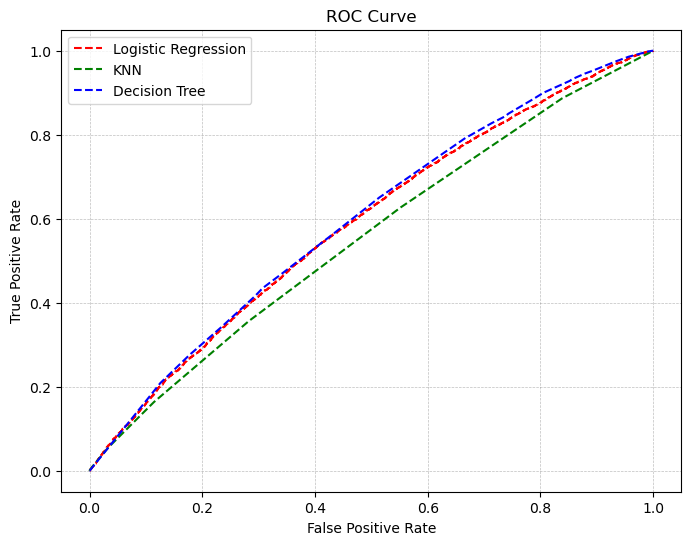

In [47]:
from sklearn.metrics import roc_auc_score

# Names of the Models
names=["Logistic Regression","Decision Tree"] 
# Creating an empty list to store metrices of columns
model_cols=[] 
df=pd.DataFrame(columns=model_cols)
index=0

# Predict Probabilities
pred_prob1 = logreg.predict_proba(X_test)[:, 1]
pred_prob2 = KNNclassifier.predict_proba(X_test)[:, 1]
pred_prob3 = dt_classifier_ap.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, accuracy_score
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3, pos_label=1)

random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
# print("ROC  for Logistic  Regression is:",fpr1)

# Calculate AUC for each model
auc1 = roc_auc_score(y_test, pred_prob1)
auc2 = roc_auc_score(y_test, pred_prob2)
auc3 = roc_auc_score(y_test, pred_prob3)

# Print AUC values
print("AUC for Logistic Regression:", auc1)
print("AUC for KNN:", auc2)
print("AUC for Decision Tree:", auc3)

plt.figure(figsize = (8,6))
plt.style.use("default")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.plot(fpr1,tpr1,linestyle='--',color="red",label="Logistic Regression")
plt.plot(fpr2,tpr2,linestyle='--',color="green",label="KNN")
plt.plot(fpr3,tpr3,linestyle='--',color="blue",label="Decision Tree")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.savefig("ROC",dpi=300)
plt.show()


if we prefer low False Positive Rate, Logistic Regression Model is a little bit better, and Decision Tree is better for higher False Positive Rate.
- False Positive Rate for our case: the model incorrectly classifies a non-delinquent instance as delinquent.
- False Negative Rate for out case: the model incorrectly classifies a delinquent instance as non-delinquent.

<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***The AUC value of Logistic Regression and Decision Tree perform better than KNN model. It means they have a better ability to distinguish between the positive and negative classes.***</u>

### Gain chart and lift chart

Gain charts are used to evaluate performance of classification model.

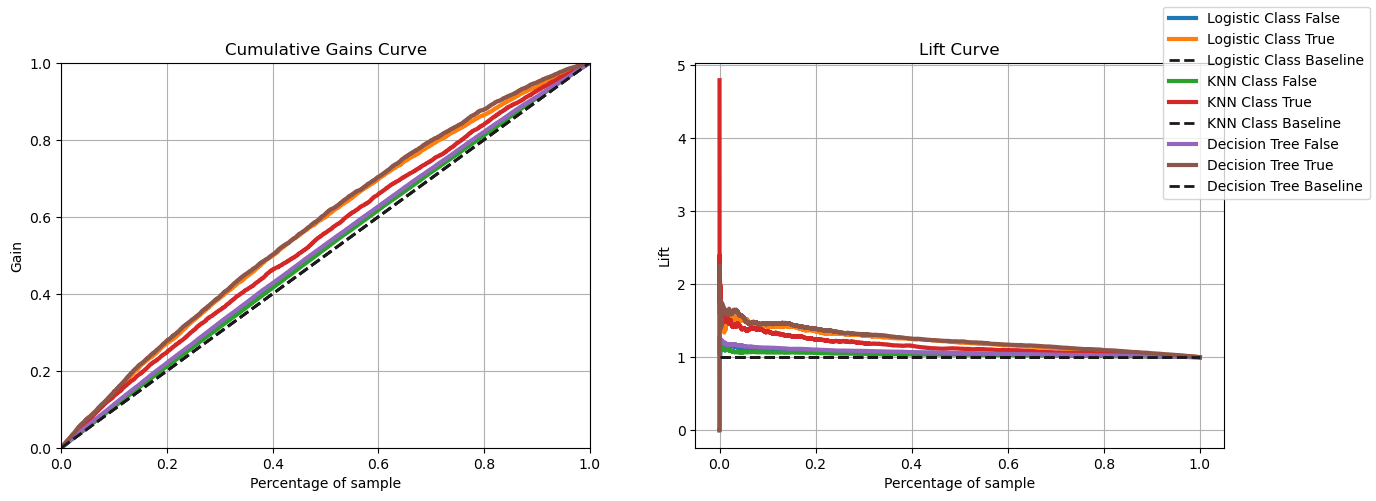

In [48]:
import scikitplot as skplt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Predict Probabilities
logreg_probabilities = logreg.predict_proba(X_test)
knn_probabilities = KNNclassifier.predict_proba(X_test)
dt_probabilities = dt_classifier_ap.predict_proba(X_test) 

# Plot Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_test, logreg_probabilities, title='Cumulative Gains Curve', ax=ax1)
skplt.metrics.plot_cumulative_gain(y_test, knn_probabilities, ax=ax1)
skplt.metrics.plot_cumulative_gain(y_test, dt_probabilities, ax=ax1)

# Plot Lift Curve
skplt.metrics.plot_lift_curve(y_test, logreg_probabilities, title='Lift Curve', ax=ax2)
skplt.metrics.plot_lift_curve(y_test, knn_probabilities, ax=ax2)
skplt.metrics.plot_lift_curve(y_test, dt_probabilities, ax=ax2)

ax1.legend().set_visible(False)  # hide the legend
ax2.legend().set_visible(False)  # hide the legend

fig.legend(["Logistic Class False","Logistic Class True","Logistic Class Baseline",
            "KNN Class False","KNN Class True","KNN Class Baseline",
            "Decision Tree False", "Decision Tree True", "Decision Tree Baseline"], loc="upper right")

plt.show()


<span style="background-color: #FFA500;">FINDINGS:</span>
<u>***The steeper the gain or lift curve, the better the model's performance. The performances all three models are close, Logistic Regression model performance a little bit better.***</u>

### Confusion matrix

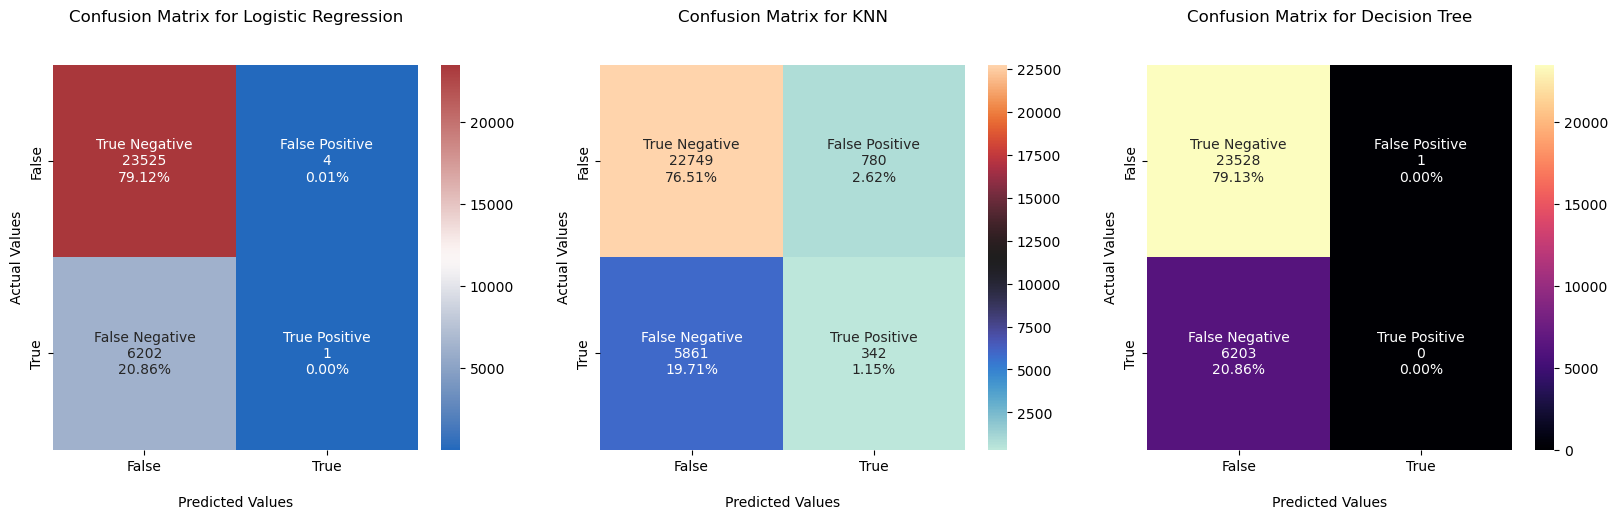

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Generate the confusion matrix label for Logistic Regression
group_names_lr = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts_lr = ["{0:0.0f}".format(value) for value in cnf_matrix_lr.flatten()]
group_percentages_lr = ["{0:.2%}".format(value) for value in (cnf_matrix_lr.flatten() / np.sum(cnf_matrix_lr.flatten()))]
labels_lr = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names_lr, group_counts_lr, group_percentages_lr)]
labels_lr = np.asarray(labels_lr).reshape(2, 2)

# Generate the confusion matrix label for KNN
group_names_knn = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts_knn = ["{0:0.0f}".format(value) for value in cnf_matrix_knn.flatten()]
group_percentages_knn = ["{0:.2%}".format(value) for value in (cnf_matrix_knn.flatten() / np.sum(cnf_matrix_knn.flatten()))]
labels_knn = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names_knn, group_counts_knn, group_percentages_knn)]
labels_knn = np.asarray(labels_knn).reshape(2, 2)

# Generate the confusion matrix label for Decision Tree
group_names_rf = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts_rf = ["{0:0.0f}".format(value) for value in cnf_matrix_dt_ap.flatten()]
group_percentages_rf = ["{0:.2%}".format(value) for value in (cnf_matrix_dt_ap.flatten() / np.sum(cnf_matrix_dt_ap.flatten()))]
labels_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names_rf, group_counts_rf, group_percentages_rf)]
labels_rf = np.asarray(labels_rf).reshape(2, 2)

# Heatmap using sns for Logistic Regression
sns.heatmap(cnf_matrix_lr, annot=labels_lr, fmt='', cmap='vlag', ax=ax1)
ax1.set_title('Confusion Matrix for Logistic Regression\n\n')
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values')

# Heatmap using sns for KNN
sns.heatmap(cnf_matrix_knn, annot=labels_knn, fmt='', cmap='icefire', ax=ax2)
ax2.set_title('Confusion Matrix for KNN\n\n')
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values')

# Heatmap using sns for Decision Tree
sns.heatmap(cnf_matrix_dt, annot=labels_rf, fmt='', cmap='magma', ax=ax3)
ax3.set_title('Confusion Matrix for Decision Tree\n\n')
ax3.set_xlabel('\nPredicted Values')
ax3.set_ylabel('Actual Values')

# Set tick labels
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix.
plt.show()

- Accuracy: This is the proportion of correctly classified instances among all instances.
- F1 Score: It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.
- Recall (Sensitivity): Recall is the proportion of actual positive instances that were correctly predicted. 
- Precision: Precision is the proportion of predicted positive instances that were actually positive. 

In [50]:
Result_knn_reg_dt = {
    'Model': ['Logistic', 'Knn', 'Decision Tree'],
    'Accuracy(%)': [accu_reg * 100, accu_knn * 100, accuracy_dt * 100],
    'F1_Score(%)': [f1_score_reg * 100, f1_score_knn * 100, f1_score_dt * 100],
    'Precision(%)': [Precision_reg * 100, Precision_knn * 100, precision_dt * 100],
    'Recall(%)': [Recall_reg * 100, Recall_knn * 100, recall_dt * 100]
}


Results = pd.DataFrame(Result_knn_reg_dt)
Results

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Logistic,79.10,69.90,66.80,79.10
1,Knn,77.70,71.00,69.30,77.70
2,Decision Tree,79.13,69.92,62.63,79.13


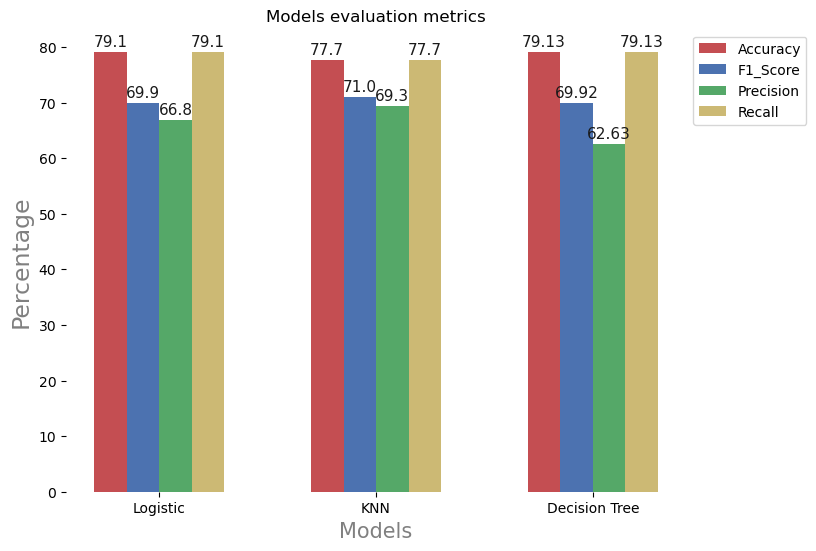

In [58]:
x = ['Logistic', 'KNN', 'Decision Tree']
width = 0.15
X = np.arange(len(x))
plt.figure(figsize=(8, 6))

bar1 = plt.bar(X, Results['Accuracy(%)'], width, color='r')
bar2 = plt.bar(X + width, Results['F1_Score(%)'], width, color='b')
bar3 = plt.bar(X + 2 * width, Results['Precision(%)'], width, color='g')
bar4 = plt.bar(X + 3 * width, Results['Recall(%)'], width, color='y')

for bar in bar1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(round(bar.get_height(), 2)),
             ha='center', color='k', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(round(bar.get_height(), 2)),
             ha='center', color='k', fontsize=11)

for bar in bar3:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(round(bar.get_height(), 2)),
             ha='center', color='k', fontsize=11)
for bar in bar4:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(round(bar.get_height(), 2)),
             ha='center', color='k', fontsize=11)

plt.xticks(X + 1.5 * width, x)
plt.legend((bar1, bar2, bar3, bar4), ('Accuracy', 'F1_Score', 'Precision', 'Recall'), bbox_to_anchor=(1, 1))
plt.title('Models evaluation metrics')
plt.ylabel('Percentage', fontsize=17, color='grey')
plt.xlabel('Models', fontsize=15, color='grey')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

<span style="background-color: #FFA500;">FINDINGS:</span>
<u> <br>
    ***- After modification:<br>
    - Decision Tree and Logistic Regression perform the highest Accuracy score and Recall value. That means those two models are capturing a high percentage of the actual positive instances and there is a reasonable balance between precision and recall in it.***<br>
    ***- KNN also has a relatively high value of Accuracy score and Recall value, which is just a little lower than Logistic Regression and Decision Tree model.***<br>
</u>

---